In [2]:
import sys; sys.path.append('/sj0243/')

In [3]:
from python_for_nustar.nu_core import np, plt, fits
from python_for_nustar.pipeline.sj0243_init import ObsList_bright, mjd_val, MJD_REF, Nu_path, plot_path, ObsAlias

# Light curve

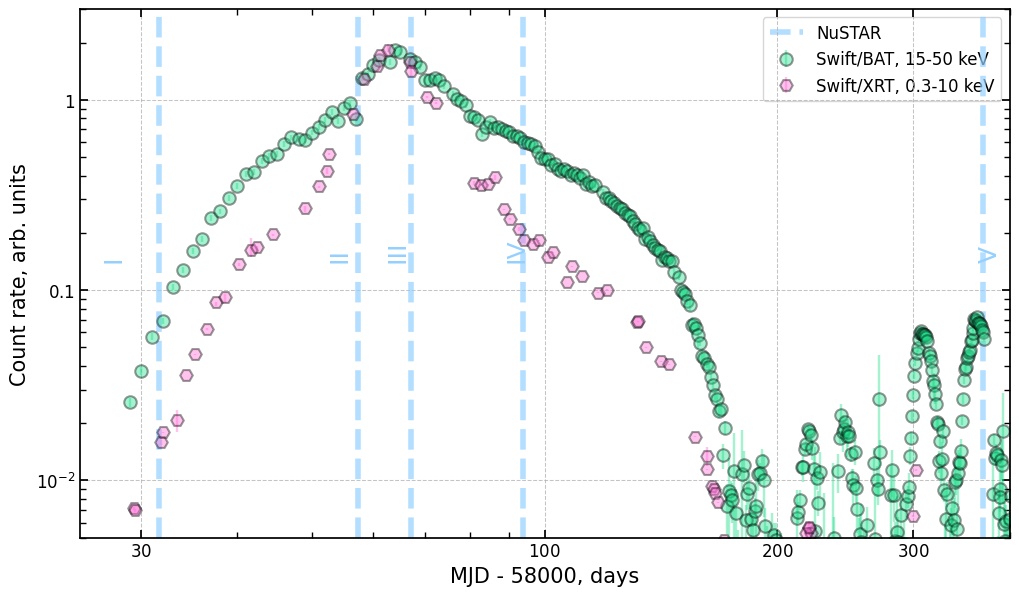

In [4]:

bat_lc = np.genfromtxt(Nu_path + "data/SwiftJ0243.6p6124.lc.txt")
bat_mjd = bat_lc[:, 0]
bat_rate = bat_lc[:, 1]
bat_error = bat_lc[:, 2]

xrt_lc = np.genfromtxt(Nu_path + "data/swift_xrt/results/lc/curve_format.qdp", comments ='!')
xrt_mjd = xrt_lc[:,0]
xrt_rate = xrt_lc[:,3]
xrt_error = np.vstack((xrt_lc[:,4],-xrt_lc[:,5]))
factor = 1/np.max(xrt_rate)*np.max(bat_rate)
xrt_rate = xrt_rate*factor
xrt_error = xrt_error*factor


fig, ax = plt.subplots(figsize=[12, 7])  # type: ignore
ax.errorbar(bat_mjd-MJD_REF, bat_rate, bat_error,
            label="Swift/BAT, 15-50 keV", color="C5", fmt = 'o', ms = 9, alpha = 0.4)

ax.errorbar(xrt_mjd-MJD_REF, xrt_rate, xrt_error,
            label="Swift/XRT, 0.3-10 keV", color="C2", fmt = 'H', ms = 9, alpha = 0.4)


for ii, ObsID in enumerate(ObsList_bright):
    mjd = mjd_val[ObsID]-MJD_REF
    ax.axvline(
        mjd,
        #label=ObsID,
        #color=next(ax._get_lines.prop_cycler)["color"],
        label = None if ii!=0 else 'NuSTAR',
        color = 'C0',
        lw=4,
        ls='--',
        alpha = 0.7,
    )
    ax.annotate(ObsAlias[ObsID].split()[0], (mjd-5, 0.15), color = 'C0', fontsize = 18, rotation = 90)

ax.set_xlim(25, 400)
ax.set_ylim(5e-3, 3)
ax.set_xlabel(f"MJD - {MJD_REF}, days")
ax.set_ylabel("Count rate, arb. units")
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xticks([30,100,200, 300])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax.xaxis.set_major_locator(matplotlib.ticker.AutoLocator())
l = ax.legend()
l.set_zorder(-1)

plt.show()
fig.tight_layout()
fig.savefig(plot_path+ 'lightcurve.pdf')


# Pulse profiles

Obs 90302319002: pulse profile  PF = 0.2939160466194153; R = 0.8325244188308716
Obs 90302319004: pulse profile  PF = 0.4508432149887085; R = 1.6419472694396973
Obs 90302319006: pulse profile  PF = 0.5425513386726379; R = 2.3720755577087402
Obs 90302319008: pulse profile  PF = 0.3188793957233429; R = 0.9363374710083008
Obs 90401334002: pulse profile  PF = 0.31538838148117065; R = 0.921364426612854


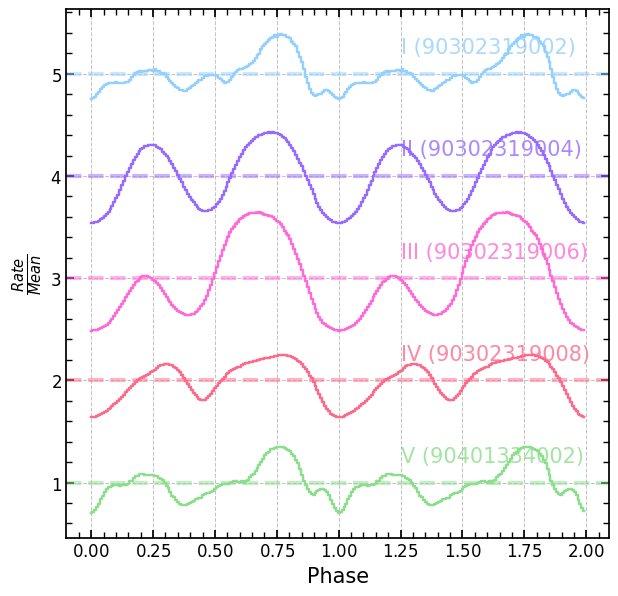

In [5]:

fig, ax = plt.subplots(figsize=[7, 7])  # type: ignore


def pf_and_relative_var(observable):
    o_min = np.min(observable)
    o_max = np.max(observable)
    pf = (o_max-o_min)/(o_max+o_min)
    rel = o_max/o_min - 1 
    return pf, rel

for ii, ObsID in enumerate(ObsList_bright):
    ii = len(ObsList_bright)-ii - 1
    f   = fits.open(f'/sj0243/results/out{ObsID}/products/spe_and_lc/spe_and_lcAB_sr.lc_bary_orb_corr_nphase_128.efold')

    ph, rate, err = f[1].data['PHASE'],  f[1].data['RATE1'],  f[1].data['ERROR1']
    roll_idx = -np.argmin(rate)

    #ph = np.roll(ph, roll_idx)
    rate = np.roll(rate, roll_idx)
    err = np.roll(err, roll_idx)

    rate = np.tile(rate, 2)
    err = np.tile(err, 2)
    ph = np.hstack((ph, ph+1))



    factor = np.mean(rate)
    rate = rate/factor
    err = err/factor

    
    pf, R  = pf_and_relative_var(rate)
    print(f'Obs {ObsID}: pulse profile  PF = {pf}; R = {R}')


    ax.step(ph, rate+ii, where='mid', label=ObsAlias[ObsID])
    color =  ax.get_lines()[-1].get_color()
    ax.errorbar(ph, rate+ii, err, fmt = 'none', color= color, ms = 10, alpha = 0.7)
    ax.axhline(ii+1, color = color, alpha = 0.5, ls = '--', lw = 3)
    ax.annotate(ObsAlias[ObsID], (1.25, 1+ii+0.2), fontsize = '15', zorder = -1, color = color, alpha = 0.8)


ax.set_xlabel(f"Phase")
ax.set_ylabel(r"$\frac{Rate}{Mean}$")
#ax.set_yscale("log")
#ax.set_xticks([30,100,200, 300])
#ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax.xaxis.set_major_locator(matplotlib.ticker.AutoLocator())
#l = ax.legend(loc = 'upper right', fontsize = 'xx-small', framealpha = 0.3)
#l.set_zorder(-1)

plt.show()
fig.tight_layout()
fig.savefig(plot_path+ 'pulse_profiles.pdf')



In [6]:
    f   = fits.open(f'/sj0243/results/out{ObsID}/products/spe_and_lc/spe_and_lcAB_sr.lc_bary_orb_corr_nphase_128.efold')

    ph, rate, err = f[1].data['PHASE'],  f[1].data['RATE1'],  f[1].data['ERROR1']
    roll_idx = np.argmin(rate)


In [7]:
f   = fits.open(f'/sj0243/results/out{ObsID}/products/spe_and_lc/spe_and_lcAB_sr.lc_bary_orb_corr_nphase_128.efold')

ph, rate, err = f[1].data['PHASE'],  f[1].data['RATE1'],  f[1].data['ERROR1']
roll_idx = -np.argmin(rate)
